In [1]:
%load_ext autoreload
%autoreload 2
from CNN import AudioClassifier
import os
import torch
import numpy as np
from torch.utils.data import DataLoader
from custom_dataset import SpectrogramDataset, create_sampler
from training_pipeline import repeat_training, set_seed, worker_init_fn, plot_results
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Fixed values

In [2]:
SEED = 42
set_seed(SEED)
repetitions = 4
lr = 0.001
epochs = 100
tolerance = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Loading data

In [3]:
data_path = "data/train/audio_transformed"
train_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.TRAIN, augmentation=True)
val_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.VAL)
test_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.TEST)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 1024
n_workers = 4
prefetch_factor = 2 if n_workers > 0 else None
persistent_workers = True if n_workers > 0 else False

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor, persistent_workers=persistent_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor, persistent_workers=persistent_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor, persistent_workers=persistent_workers)

In [4]:
# oversampling
# alpha = 1
# sampler = create_sampler(train_dataset, alpha)
# train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

## Oversampling

In [5]:
def init_cnn_oversampling():
     return AudioClassifier(num_classes=11, drop=0.3)

set_seed(SEED)

alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for alpha in alphas:
    model_dir = f"output/models/all_classes/cnn/oversampling/oversampling={alpha}"
    history_dir = f"output/history/all_classes/cnn/oversampling/oversampling={alpha}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"

    sampler = create_sampler(train_dataset, alpha)
    train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

    repeat_training(repetitions, init_cnn_oversampling, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance)

training iteration: 1 of 4
starting training...
epoch: 1, training loss: 0.001545875912227117, training accuracy: 62.62135922330097, training balanced accuracy: 9.090610100812004
epoch: 1, validation loss: 0.001552246236983521, validation accuracy: 62.09179170344219, validation balanced accuracy: 9.090909090909092
model saved

epoch: 2, training loss: 0.0014385314354357435, training accuracy: 63.79384591293454, training balanced accuracy: 9.090909090909092
epoch: 2, validation loss: 0.0014728435911687552, validation accuracy: 62.09179170344219, validation balanced accuracy: 9.090909090909092
model saved

epoch: 3, training loss: 0.0013804592395179741, training accuracy: 63.519808957093645, training balanced accuracy: 10.186222688916708
epoch: 3, validation loss: 0.0013164868159096323, validation accuracy: 63.10679611650485, validation balanced accuracy: 12.735991634602028
model saved

epoch: 4, training loss: 0.0013046732240622222, training accuracy: 63.977842154713436, training balanc

In [6]:
# extension
set_seed(SEED)

alphas = [0.8]
for alpha in alphas:
    model_dir = f"output/models/all_classes/cnn/oversampling/oversampling={alpha}"
    history_dir = f"output/history/all_classes/cnn/oversampling/oversampling={alpha}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"

    sampler = create_sampler(train_dataset, alpha)
    train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

    repeat_training(repetitions, init_cnn_oversampling, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance)

training iteration: 1 of 4
starting training...
epoch: 1, training loss: 0.0022338931458966323, training accuracy: 17.060757907923584, training balanced accuracy: 13.73280192033646
epoch: 1, validation loss: 0.0020688944930502794, validation accuracy: 19.358634892615473, validation balanced accuracy: 24.40312222126476
model saved

epoch: 2, training loss: 0.001965614142479136, training accuracy: 25.432586908863136, training balanced accuracy: 24.342418154476633
epoch: 2, validation loss: 0.0019233308668941847, validation accuracy: 21.138570167696383, validation balanced accuracy: 35.09919719148918
model saved

epoch: 3, training loss: 0.0017724991932095984, training accuracy: 32.94119949890385, training balanced accuracy: 32.64103948426541
epoch: 3, validation loss: 0.0017073708058946728, validation accuracy: 30.817887614004118, validation balanced accuracy: 41.9280041242671
model saved

epoch: 4, training loss: 0.0016707426611995608, training accuracy: 37.02630754776072, training bala

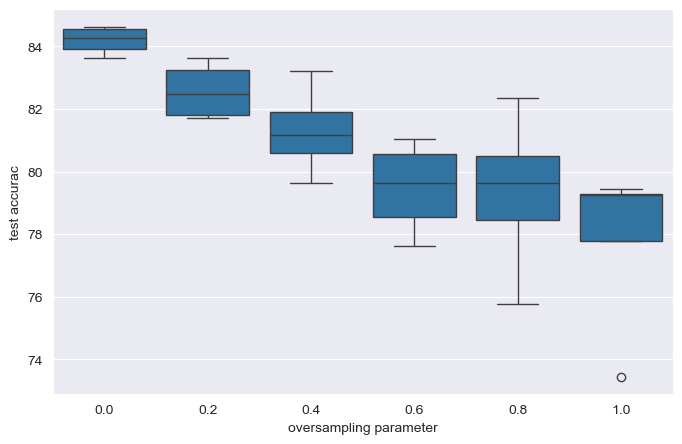

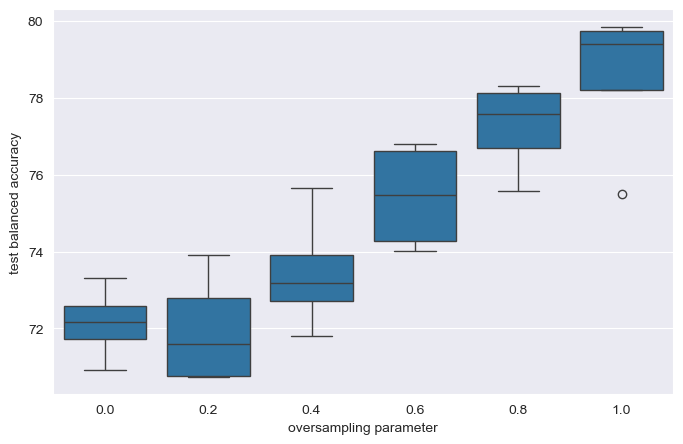

In [2]:
oversampling_root_dir = "output/history/all_classes/cnn/oversampling"
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
x_label = "oversampling parameter"
plot_results(oversampling_root_dir, alphas, x_label, use_balanced_accuracy=False) # not considered case
plot_results(oversampling_root_dir, alphas, x_label, use_balanced_accuracy=True)

## Dropout

In [ ]:
def init_cnn_dropout(dropout):
     return AudioClassifier(num_classes=11, drop=dropout)

set_seed(SEED)

optimal_alpha = 1 # select from above
sampler = create_sampler(train_dataset, optimal_alpha)
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

dropouts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
for dropout in dropouts:
    model_dir = f"output/models/all_classes/cnn/dropout/dropout={dropout}"
    history_dir = f"output/history/all_classes/cnn/dropout/dropout={dropout}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"
    
    repeat_training(repetitions, init_cnn_dropout, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance, dropout=dropout)


## Weight decay

In [ ]:
optimal_dropout = None
def init_cnn_weight_decay():
     return AudioClassifier(num_classes=11, drop=optimal_dropout)

set_seed(SEED)

optimal_alpha = 1
sampler = create_sampler(train_dataset, optimal_alpha)
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

weight_decays = [0.0, 0.00001, 0.0001, 0.001]
for weight_decay in weight_decays:
    model_dir = f"output/models/all_classes/cnn/weight_decay/weight_decay={weight_decay}"
    history_dir = f"output/history/all_classes/cnn/weight_decay/weight_decay={weight_decay}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"
    
    repeat_training(repetitions, init_cnn_weight_decay, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance, weight_decay=weight_decay)

## Augmentation strength?

## Some additional tests

In [5]:
repetitions = 1
lr = 0.001
epochs = 100
tolerance = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_dir = "output/models/cnn"
history_dir = "output/history/cnn"

os.makedirs(model_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)

model_path = model_dir + "/cnn.pth"
history_path = history_dir + "/cnn.pkl"

repeat_training(repetitions, AudioClassifier, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance)

training iteration: 1 of 1
starting training...
epoch: 1, training loss: 0.0022353989005350146, training accuracy: 16.066395239586594, training balanced accuracy: 16.07443069702323
epoch: 1, validation loss: 0.0024062392991512937, validation accuracy: 10.85613415710503, validation balanced accuracy: 26.04198459782836
model saved

epoch: 2, training loss: 0.001942474302866972, training accuracy: 27.256890072032572, training balanced accuracy: 27.024779180642543
epoch: 2, validation loss: 0.002037293053823697, validation accuracy: 17.519858781994703, validation balanced accuracy: 37.67598838964901
model saved

epoch: 3, training loss: 0.0017372012451043744, training accuracy: 34.74788600062637, training balanced accuracy: 34.58683008677666
epoch: 3, validation loss: 0.0019925860981269247, validation accuracy: 21.932921447484553, validation balanced accuracy: 43.87640732492347
model saved

epoch: 4, training loss: 0.0016287716273002554, training accuracy: 39.451534606952706, training bala

In [6]:
best_model = AudioClassifier()
best_model.to(device)
best_model.load_state_dict(torch.load("output/models/cnn/cnn_1.pth", weights_only=True))

<All keys matched successfully>

In [7]:
all_preds = []
best_model.eval()
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        output = best_model(x)
        _, predicted = torch.max(output, 1)
        all_preds.extend(predicted.cpu().tolist())

pred_counts = Counter(all_preds)
sorted_pred_counts = dict(sorted(pred_counts.items()))
print(sorted_pred_counts)

{0: 375, 1: 354, 2: 333, 3: 368, 4: 308, 5: 435, 6: 340, 7: 348, 8: 422, 9: 267, 10: 3285}


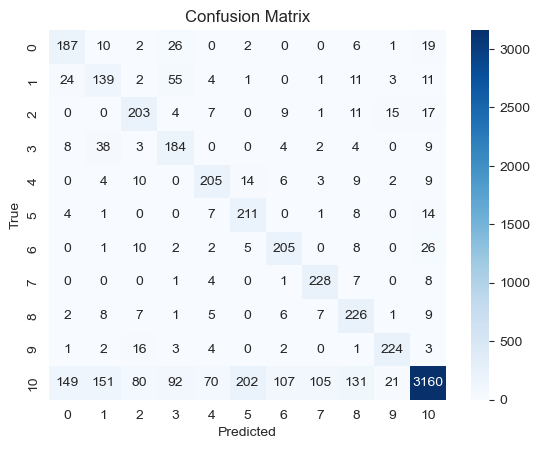

In [8]:
true_labels = []
predictions = []

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        output = best_model(x)
        _, predicted = torch.max(output, 1)
        
        true_labels.extend(y.cpu().tolist())
        predictions.extend(predicted.cpu().tolist())

unique_labels = np.unique(true_labels)
cm = confusion_matrix(true_labels, predictions, labels=unique_labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Historical results on unbalanced dataset

In [7]:
best_model = AudioClassifier()
best_model.to(device)
best_model.load_state_dict(torch.load("output/models/cnn/cnn_2.pth", weights_only=True))

<All keys matched successfully>

In [8]:
all_preds = []
best_model.eval()
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        output = best_model(x)
        _, predicted = torch.max(output, 1)
        all_preds.extend(predicted.cpu().tolist())

pred_counts = Counter(all_preds)
sorted_pred_counts = dict(sorted(pred_counts.items()))
print(sorted_pred_counts)

{0: 193, 2: 318, 4: 59, 6: 144, 7: 194, 8: 77, 9: 270, 10: 5580}


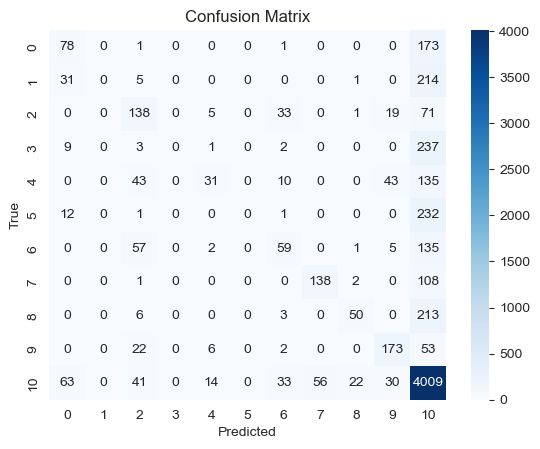

In [9]:
true_labels = []
predictions = []

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        output = best_model(x)
        _, predicted = torch.max(output, 1)
        
        true_labels.extend(y.cpu().tolist())
        predictions.extend(predicted.cpu().tolist())

unique_labels = np.unique(true_labels)
cm = confusion_matrix(true_labels, predictions, labels=unique_labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()